<a href="https://colab.research.google.com/github/lucastanger/classification_optimization/blob/main/classification_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparison and Optimization of ML Classifiers using Sklearn

*   See [GitHub](https://github.com/lucastanger/classification_optimization) Repository for further information



In [ ]:
# https://archive.ics.uci.edu/ml/datasets/Bank+Marketing
# Necessary imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, roc_curve, accuracy_score, plot_roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

%matplotlib inline

sns.set_style("dark")

#Attribute Information:

Input variables:
### bank client data:
1 - age (numeric) <br>
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') <br>
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed) <br>
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown') <br>
5 - default: has credit in default? (categorical: 'no','yes','unknown') <br>
6 - housing: has housing loan? (categorical: 'no','yes','unknown') <br> 
7 - loan: has personal loan? (categorical: 'no','yes','unknown') <br>
### related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')<br>
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. <br>
### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
14 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br>
### social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)<br>
17 - cons.price.idx: consumer price index - monthly indicator (numeric)<br>
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)<br>
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)<br>
20 - nr.employed: number of employees - quarterly indicator (numeric)<br>

### Output variable (desired target):<br>
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')<br>

In [ ]:
# Load data from source

# data = pd.read_csv('https://gist.githubusercontent.com/lucastanger/0f54af9a99e3618e99d191b88991af5b/raw/faaffa81cfff769f9cef3e4f6bbddecb78fda40f/bank_full_dataset.csv', sep=";")
# data = pd.read_csv('https://gist.githubusercontent.com/lucastanger/3459c3aab432298799e5f512c4b38155/raw/595a25db7488a9893ad83eb33c54447cf45fe9ce/bank_dataset.csv', sep=";")
from io import BytesIO
from zipfile import ZipFile
from google.colab import output
from urllib.request import urlopen

file_num = 0
while file_num < 1 or file_num > 4:
  output.clear()
  print('Welche Datei soll geladen werden:\n<1> bank.csv\n<2> bank-full.csv\n<3> bank-additional.csv\n<4> bank-additional-full.csv\n')
  file_num = int(input('Zahl hier eingeben: '))

if file_num == 1 or file_num == 2:
  url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip'
elif file_num == 3 or file_num == 4:
  url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip'

filenames = {1: 'bank.csv',
             2: 'bank-full.csv',
             3: 'bank-additional/bank-additional.csv',
             4: 'bank-additional/bank-additional-full.csv'}

resp = urlopen(url)
zf = ZipFile(BytesIO(resp.read()))
data = pd.read_csv(zf.open(filenames[file_num]), sep=";")

data

Welche Datei soll geladen werden:
<1> bank.csv
<2> bank-full.csv
<3> bank-additional.csv
<4> bank-additional-full.csv

Zahl hier eingeben: 3


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,53,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,219,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,64,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,528,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [ ]:
# Check frequency of target values
data['y'].value_counts()

no     3668
yes     451
Name: y, dtype: int64

In [ ]:
# Show statistics for numerical data
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
# Select all data
X = data.iloc[:, :-1]
# Select target column
y = data.iloc[:, -1]

In [ ]:
# Initialize LabelEncoder
le = LabelEncoder()

# Iterate all categorical columns and transform them
for col in X.select_dtypes(include=np.object):
  X[col] = le.fit_transform(X[col]) 

X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,30,1,1,2,0,2,0,0,6,0,487,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1
1,39,7,2,3,0,0,0,1,6,0,346,4,999,0,1,1.1,93.994,-36.4,4.855,5191.0
2,25,7,1,3,0,2,0,1,4,4,227,1,999,0,1,1.4,94.465,-41.8,4.962,5228.1
3,38,7,1,2,0,1,1,1,4,0,17,3,999,0,1,1.4,94.465,-41.8,4.959,5228.1
4,47,0,1,6,0,2,0,0,7,1,58,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,0,1,1,0,2,2,0,3,2,53,1,999,0,1,1.4,93.918,-42.7,4.958,5228.1
4115,39,0,1,3,0,2,0,1,3,0,219,1,999,0,1,1.4,93.918,-42.7,4.959,5228.1
4116,27,8,2,3,0,0,0,0,6,1,64,2,999,1,0,-1.8,92.893,-46.2,1.354,5099.1
4117,58,0,1,3,0,0,0,0,1,0,528,1,999,0,1,1.4,93.444,-36.1,4.966,5228.1


In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize columns
scaler = StandardScaler()
# Fit scaler with input data
scaler.fit(X)
# Scale data
X_scaled = scaler.transform(X)
# Overwrite existing dataset with scaled data
X = pd.DataFrame(data=X_scaled, columns=X.columns)
# Check scaled data
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,-0.980752,-0.783431,-0.291925,-0.828300,-0.492099,0.933554,-0.469803,-0.743752,0.739737,-1.446809,0.903952,-0.209228,0.201031,-0.351356,0.203199,-1.206054,-1.185448,-1.240939,-1.331707,-0.914779
1,-0.107991,0.880518,1.357513,-0.363038,-0.492099,-1.099388,-0.469803,1.344534,0.739737,-1.446809,0.350300,0.569634,0.201031,-0.351356,0.203199,0.649441,0.715193,0.892269,0.711698,0.332862
2,-1.465619,0.880518,-0.291925,-0.363038,-0.492099,0.933554,-0.469803,1.344534,-0.127977,1.432827,-0.116966,-0.598660,0.201031,-0.351356,0.203199,0.841389,1.528273,-0.283172,0.773427,0.836535
3,-0.204965,0.880518,-0.291925,-0.828300,-0.492099,-0.082917,0.878711,1.344534,-0.127977,-1.446809,-0.941553,0.180203,0.201031,-0.351356,0.203199,0.841389,1.528273,-0.283172,0.771697,0.836535
4,0.667795,-1.060755,-0.291925,1.032748,-0.492099,0.933554,-0.469803,-0.743752,1.173594,-0.726900,-0.780563,-0.598660,0.201031,-0.351356,0.203199,-0.118350,-0.655478,-0.326707,0.328632,0.398028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,-0.980752,-1.060755,-0.291925,-1.293561,-0.492099,0.933554,2.227225,-0.743752,-0.561833,-0.006991,-0.800196,-0.598660,0.201031,-0.351356,0.203199,0.841389,0.583995,-0.479079,0.771120,0.836535
4115,-0.107991,-1.060755,-0.291925,-0.363038,-0.492099,0.933554,-0.469803,1.344534,-0.561833,-1.446809,-0.148379,-0.598660,0.201031,-0.351356,0.203199,0.841389,0.583995,-0.479079,0.771697,0.836535
4116,-1.271672,1.157843,1.357513,-0.363038,-0.492099,-1.099388,-0.469803,-0.743752,0.739737,-0.726900,-0.757003,-0.209228,0.201031,1.494607,-2.479417,-1.206054,-1.185448,-1.240939,-1.308054,-0.914779
4117,1.734503,-1.060755,-0.291925,-0.363038,-0.492099,-1.099388,-0.469803,-0.743752,-1.429547,-1.446809,1.064943,-0.598660,0.201031,-0.351356,0.203199,0.841389,-0.234264,0.957571,0.775735,0.836535


In [ ]:
# Tranform target variable to binary values
transformer = LabelBinarizer().fit(y)

y = transformer.transform(y)

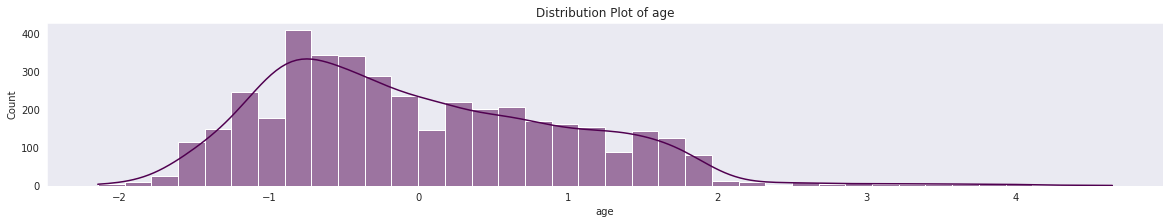

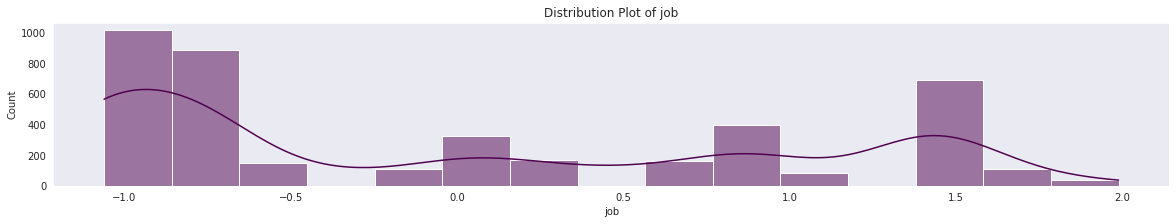

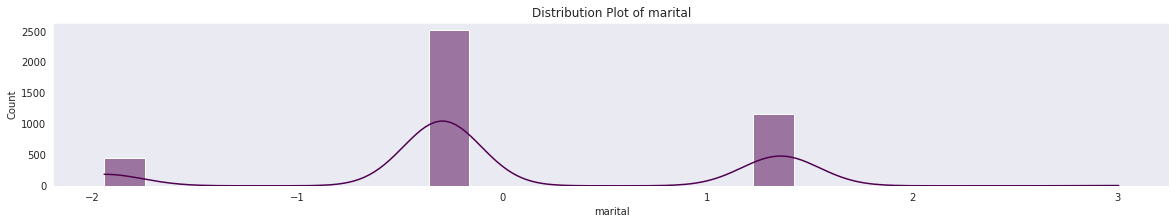

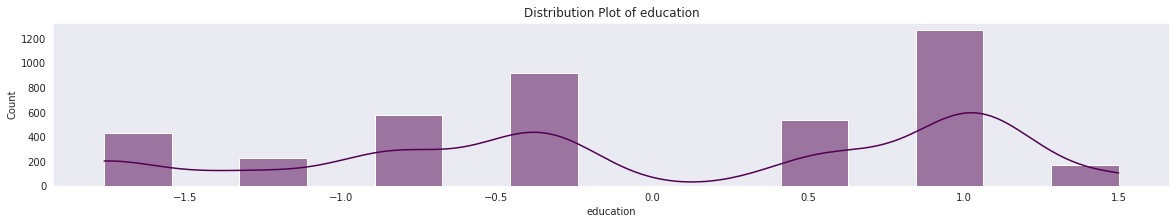

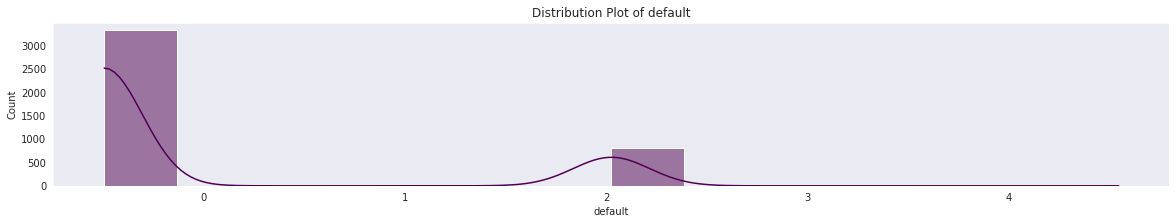

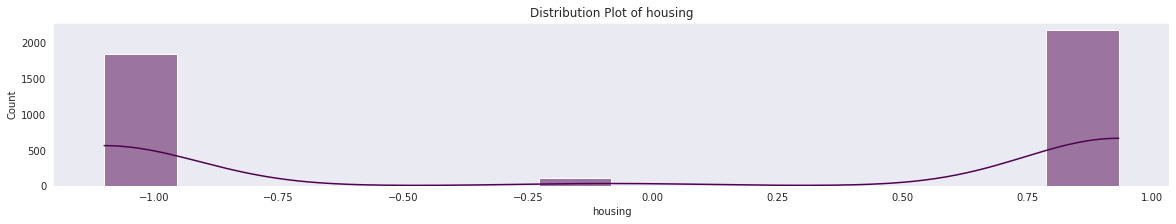

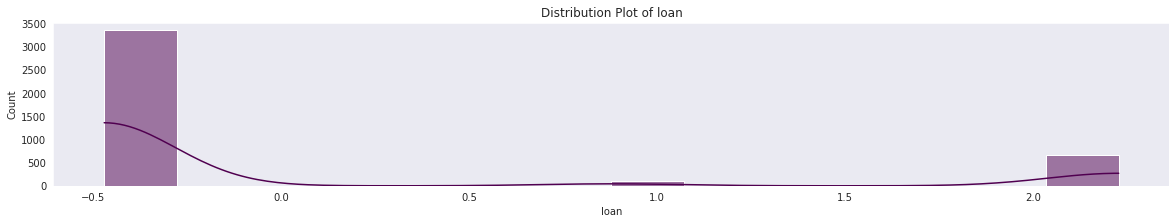

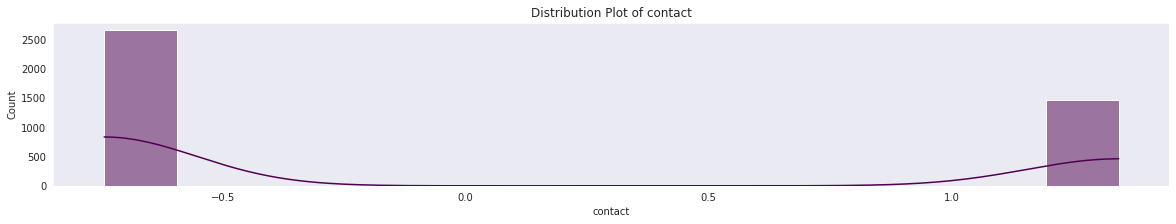

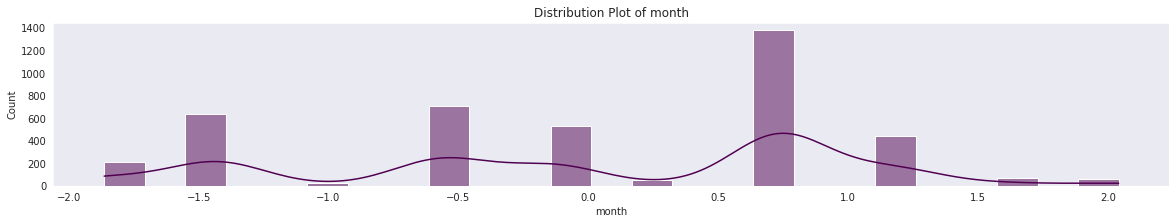

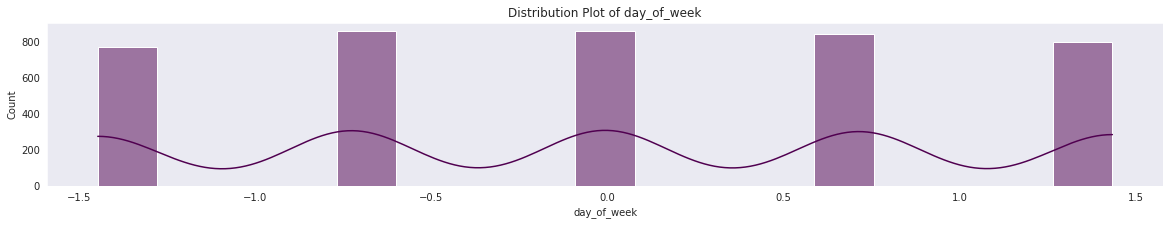

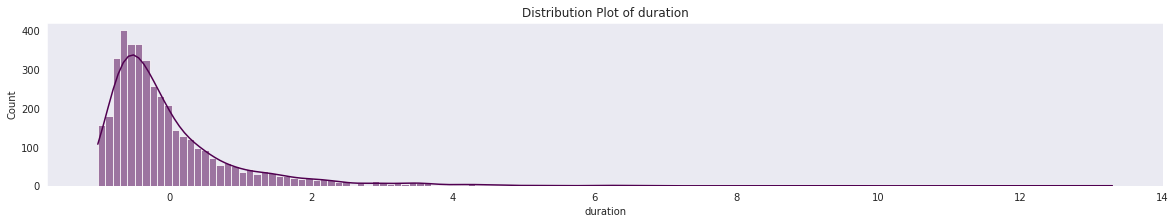

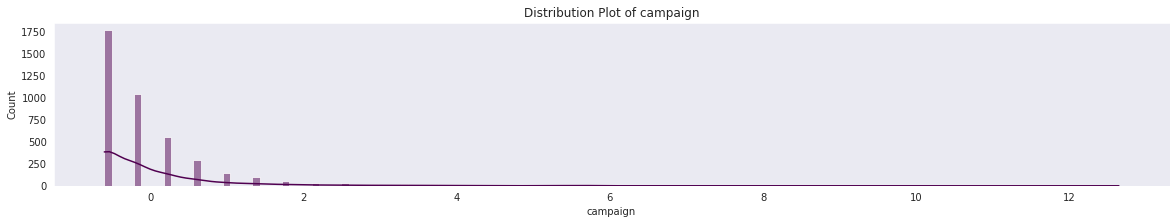

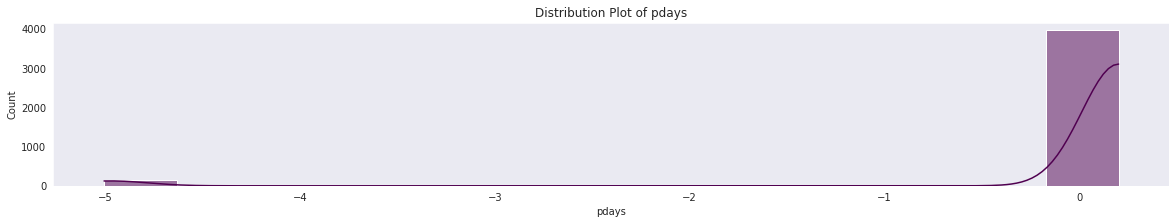

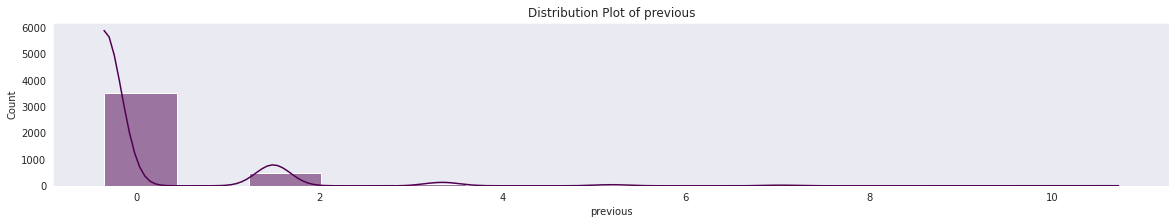

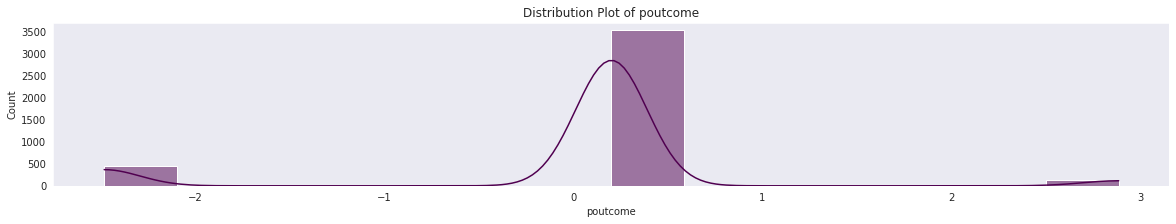

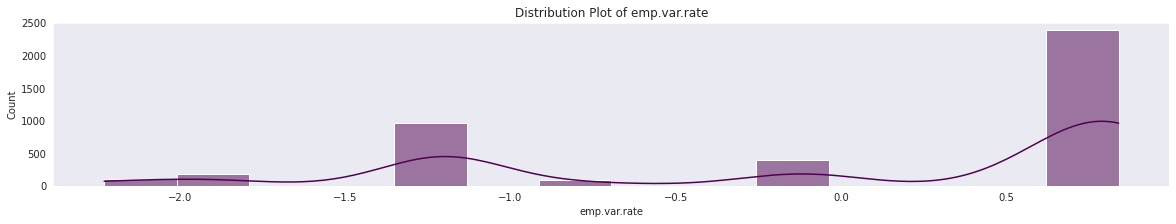

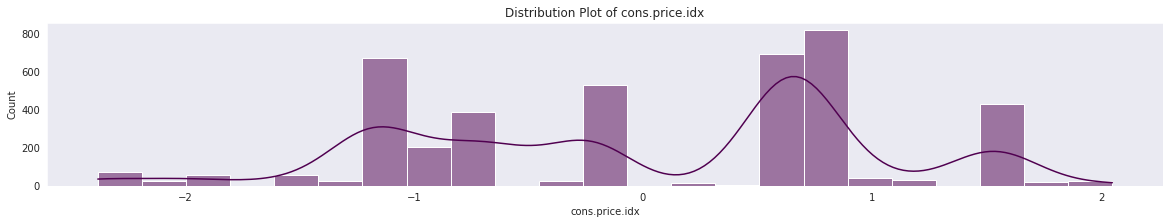

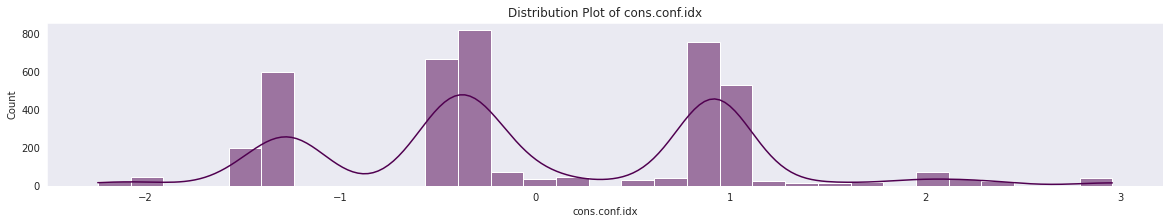

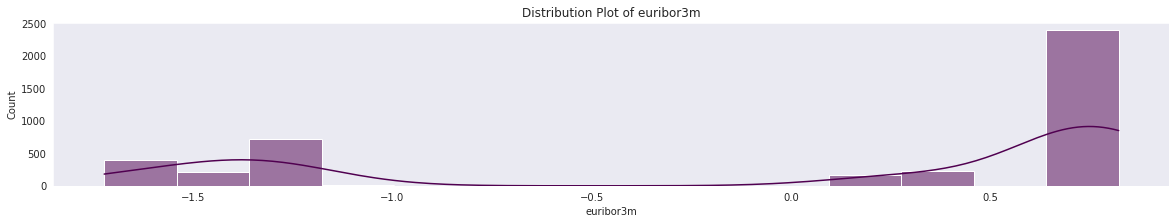

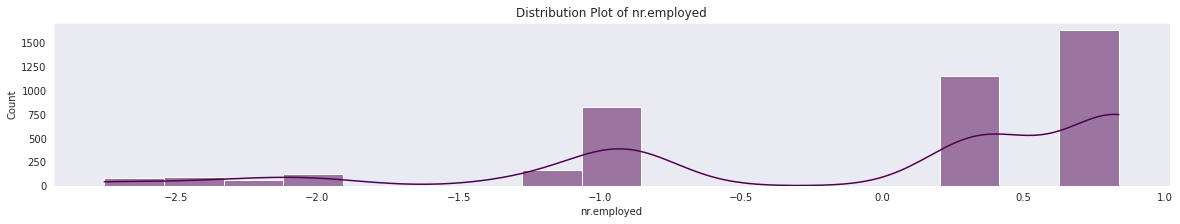

In [ ]:
# Analyze all columns
# Iterate all colums
for entry in X: 
  plt.figure(figsize=(20,3))

  plt.subplot()
  # Create histogram with distribution plot
  sns.histplot(data=X[entry], color='#500050', kde=True)
  # Set title
  plt.title(f'Distribution Plot of {entry}')
  # Display plot
  plt.show()

In [ ]:
# Print shapes of data
print(X.shape)
print(y.shape)

(4119, 20)
(4119, 1)


# Classification

In [ ]:
# Import classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# Training + Validierung
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Convert y_train into np.array
y_t = np.array(y_train)

In [ ]:
# empty list for fitted models
models = []

# Instances of all models
mod = [
       SVC(kernel='linear'), 
       SVC(kernel='rbf'), 
       SVC(kernel='sigmoid'), 
       SVC(kernel='poly'), 
       KNeighborsClassifier(), 
       SGDClassifier(), 
       GaussianNB(), 
       DecisionTreeClassifier(), 
       AdaBoostClassifier()]

In [ ]:
# Iterate all models and fit them with training data
for m in mod:
  m.fit(X_train, y_t.ravel())
  y_pred = m.predict(X_test)
  # Append models to models list
  models.append(m)

In [ ]:
# Prepare GridSearchCV
# Create parameter list for each model
from sklearn.model_selection import GridSearchCV

svm_params = {'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),
              'degree': (2,3),
              'gamma': ('auto', 'scale'),
              'shrinking': (True, False),
              'decision_function_shape': ('ovo', 'ovr')}

knn_params = {'n_neighbors': [5,10,15],
              'weights': ('uniform', 'distance'),
              'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
              'leaf_size': [20,30,40,50]}

sgd_params = {'loss':('hinge', 'log'), 
              'penalty': ('l2', 'l1', 'elasticnet'),
              'alpha': [1e-1, 1e-2, 1e-3, 1e-4, 5e-4, 1e-5],
              'max_iter': np.arange(start = 700, stop = 1500, step = 100)}

nb_params = {}

tree_params = {'criterion': ('gini', 'entropy'),
               'splitter': ('best', 'random')}

ada_params = {'n_estimators': np.arange(start = 10, stop = 100, step = 10),
              'algorithm': ('SAMME', 'SAMME.R')}

params = [svm_params, knn_params, sgd_params, nb_params, tree_params, ada_params]

# Optimierung der Modelle durch Evaluierung der Parameter

In [ ]:
# Empty list for storage of best models
bestModels = []
# Instances of Classification models to be optimized
modelsToOptimize = [SVC(), KNeighborsClassifier(), SGDClassifier(), GaussianNB(), DecisionTreeClassifier(), AdaBoostClassifier()]

In [ ]:
# Evaluate parameter lists 
for i, m in enumerate(modelsToOptimize):
  # Gridsearch all models with proper params
  gridsearch = GridSearchCV(m, params[i])
  # Fit optimal model with training data
  gridsearch.fit(X_train, y_t.ravel())
  # Print out best fitting params
  print('Best Parameter: ', gridsearch.best_params_)
  # Append best evaluated model to bestModels list
  bestModels.append(gridsearch.best_estimator_)

Best Parameter:  {'decision_function_shape': 'ovo', 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf', 'shrinking': True}
Best Parameter:  {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 10, 'weights': 'distance'}
Best Parameter:  {'alpha': 0.001, 'loss': 'log', 'max_iter': 800, 'penalty': 'elasticnet'}
Best Parameter:  {}
Best Parameter:  {'criterion': 'gini', 'splitter': 'best'}
Best Parameter:  {'algorithm': 'SAMME', 'n_estimators': 70}


In [ ]:
# Print every model with best parameters
bestModels

[SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovo', degree=2, gamma='auto', kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                      weights='distance'),
 SGDClassifier(alpha=0.001, average=False, class_weight=None,
               early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
               l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=800,
               n_iter_no_change=5, n_jobs=None, penalty='elasticnet',
               power_t=0.5, random_state=None, shuffle=True, tol=0.001,
               validation_fraction=0.1, verbose=0, warm_start=False),
 GaussianNB(priors=None, var_smoothing=1e-09),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gi

# Vergleich verschiedener Klassifikatoren


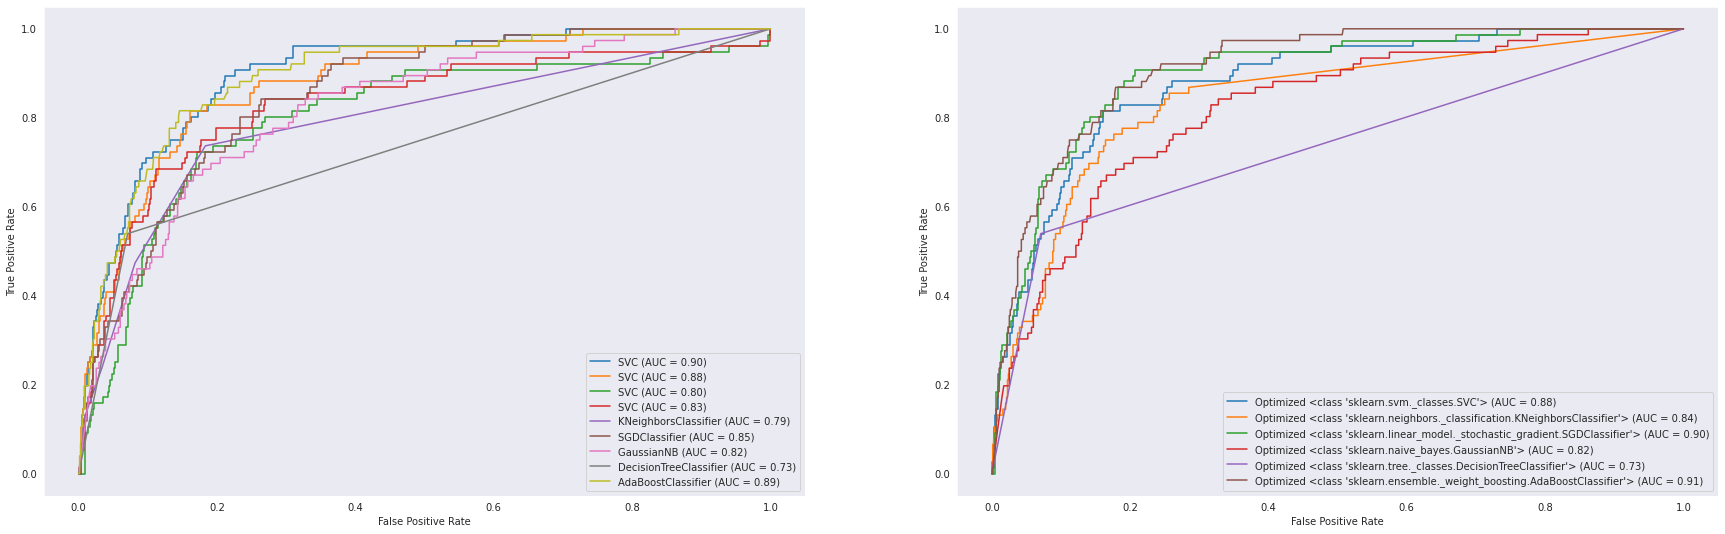

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30,9))

# Plot unoptimized ROC Curves
for m in models:
  plot_roc_curve(m, X_test, y_test, ax=ax[0])
# Plot optimized ROV Curves
for m in bestModels:
  plot_roc_curve(m, X_test, y_test, ax=ax[1], name=f'Optimized {m.__class__}')
# See AUC Scores for comparison

In [ ]:
from sklearn.model_selection import cross_val_score as cvs

print('According to F1 scorring method we got below scores for our machine learning models:')
# Names to be printed
modelNames = ['Linear SVM', 'Radial Basis Function SVM', 'Polynomial SVM', 'Sigmoid SVM', 'KNearestNeighbors', 'SGD', 'GaussianNB', 'DecisionTree', 'AdaBoost']
# 
modelFrame = pd.DataFrame({'modelNames': modelNames, 'modelClassificators': models})
# Iteration variable
counter = 0
# Empty metrics list
score = []
for i in modelFrame['modelClassificators']:
  # Compute weighted f1-Score
  f1_weighted = cvs(i, X_train, y_t.ravel(), scoring='f1_weighted', cv=5)
  print('Weighted F1 Score of %s Classification model is %.2f (+/- %0.2f)' %(modelFrame.iloc[counter,0],f1_weighted.mean(), f1_weighted.std()))
  # Append score to list
  score.append(f1_weighted.mean())
  # Iterate
  counter+=1

According to F1 scorring method we got below scores for our machine learning models:
Weighted F1 Score of Linear SVM Classification model is 0.83 (+/- 0.00)
Weighted F1 Score of Radial Basis Function SVM Classification model is 0.86 (+/- 0.01)
Weighted F1 Score of Polynomial SVM Classification model is 0.85 (+/- 0.00)
Weighted F1 Score of Sigmoid SVM Classification model is 0.86 (+/- 0.01)
Weighted F1 Score of KNearestNeighbors Classification model is 0.87 (+/- 0.01)
Weighted F1 Score of SGD Classification model is 0.85 (+/- 0.01)
Weighted F1 Score of GaussianNB Classification model is 0.84 (+/- 0.01)
Weighted F1 Score of DecisionTree Classification model is 0.87 (+/- 0.01)
Weighted F1 Score of AdaBoost Classification model is 0.88 (+/- 0.01)


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, log_loss, precision_score, recall_score, roc_auc_score
# Names to be printed
bestModelNames = ['SVM', 'kNN', 'SGD', 'NaiveBayes', 'DecisionTree', 'AdaBoost']
# Create Metric Data Frames
acc_df = pd.DataFrame({'SVM': [], 'kNN': [], 'SGD': [], 'NaiveBayes': [], 'DecisionTree': [], 'AdaBoost': []})
f1_df = pd.DataFrame({'SVM': [], 'kNN': [], 'SGD': [], 'NaiveBayes': [], 'DecisionTree': [], 'AdaBoost': []})
jaccard_df = pd.DataFrame({'SVM': [], 'kNN': [], 'SGD': [], 'NaiveBayes': [], 'DecisionTree': [], 'AdaBoost': []})
precision_df = pd.DataFrame({'SVM': [], 'kNN': [], 'SGD': [], 'NaiveBayes': [], 'DecisionTree': [], 'AdaBoost': []})
recall_df = pd.DataFrame({'SVM': [], 'kNN': [], 'SGD': [], 'NaiveBayes': [], 'DecisionTree': [], 'AdaBoost': []})
roc_auc_df = pd.DataFrame({'SVM': [], 'kNN': [], 'SGD': [], 'NaiveBayes': [], 'DecisionTree': [], 'AdaBoost': []})

# Crossvalidate all scoring methods
for c, i in enumerate(bestModels):
  # Pick model for list selection
  model = bestModelNames[c]
  # Store metrics into appropriate DataFrame
  acc_df[model] = cvs(i, X_train, y_t.ravel(), scoring="accuracy", cv=5)
  f1_df[model] = cvs(i, X_train, y_t.ravel(), scoring="f1_weighted", cv=5)
  jaccard_df[model] = cvs(i, X_train, y_t.ravel(), scoring="jaccard", cv=5)
  precision_df[model] = cvs(i, X_train, y_t.ravel(), scoring="precision", cv=5)
  recall_df[model] = cvs(i, X_train, y_t.ravel(), scoring="recall", cv=5)
  roc_auc_df[model] = cvs(i, X_train, y_t.ravel(), scoring="roc_auc", cv=5)

In [ ]:
# Create lists for further iteration
scores = [acc_df, f1_df, jaccard_df, precision_df, recall_df, roc_auc_df]
score_names = ['Accuracy', 'F1 Weighted', 'Jaccard','Precision', 'Recall', 'ROC AUC Score']

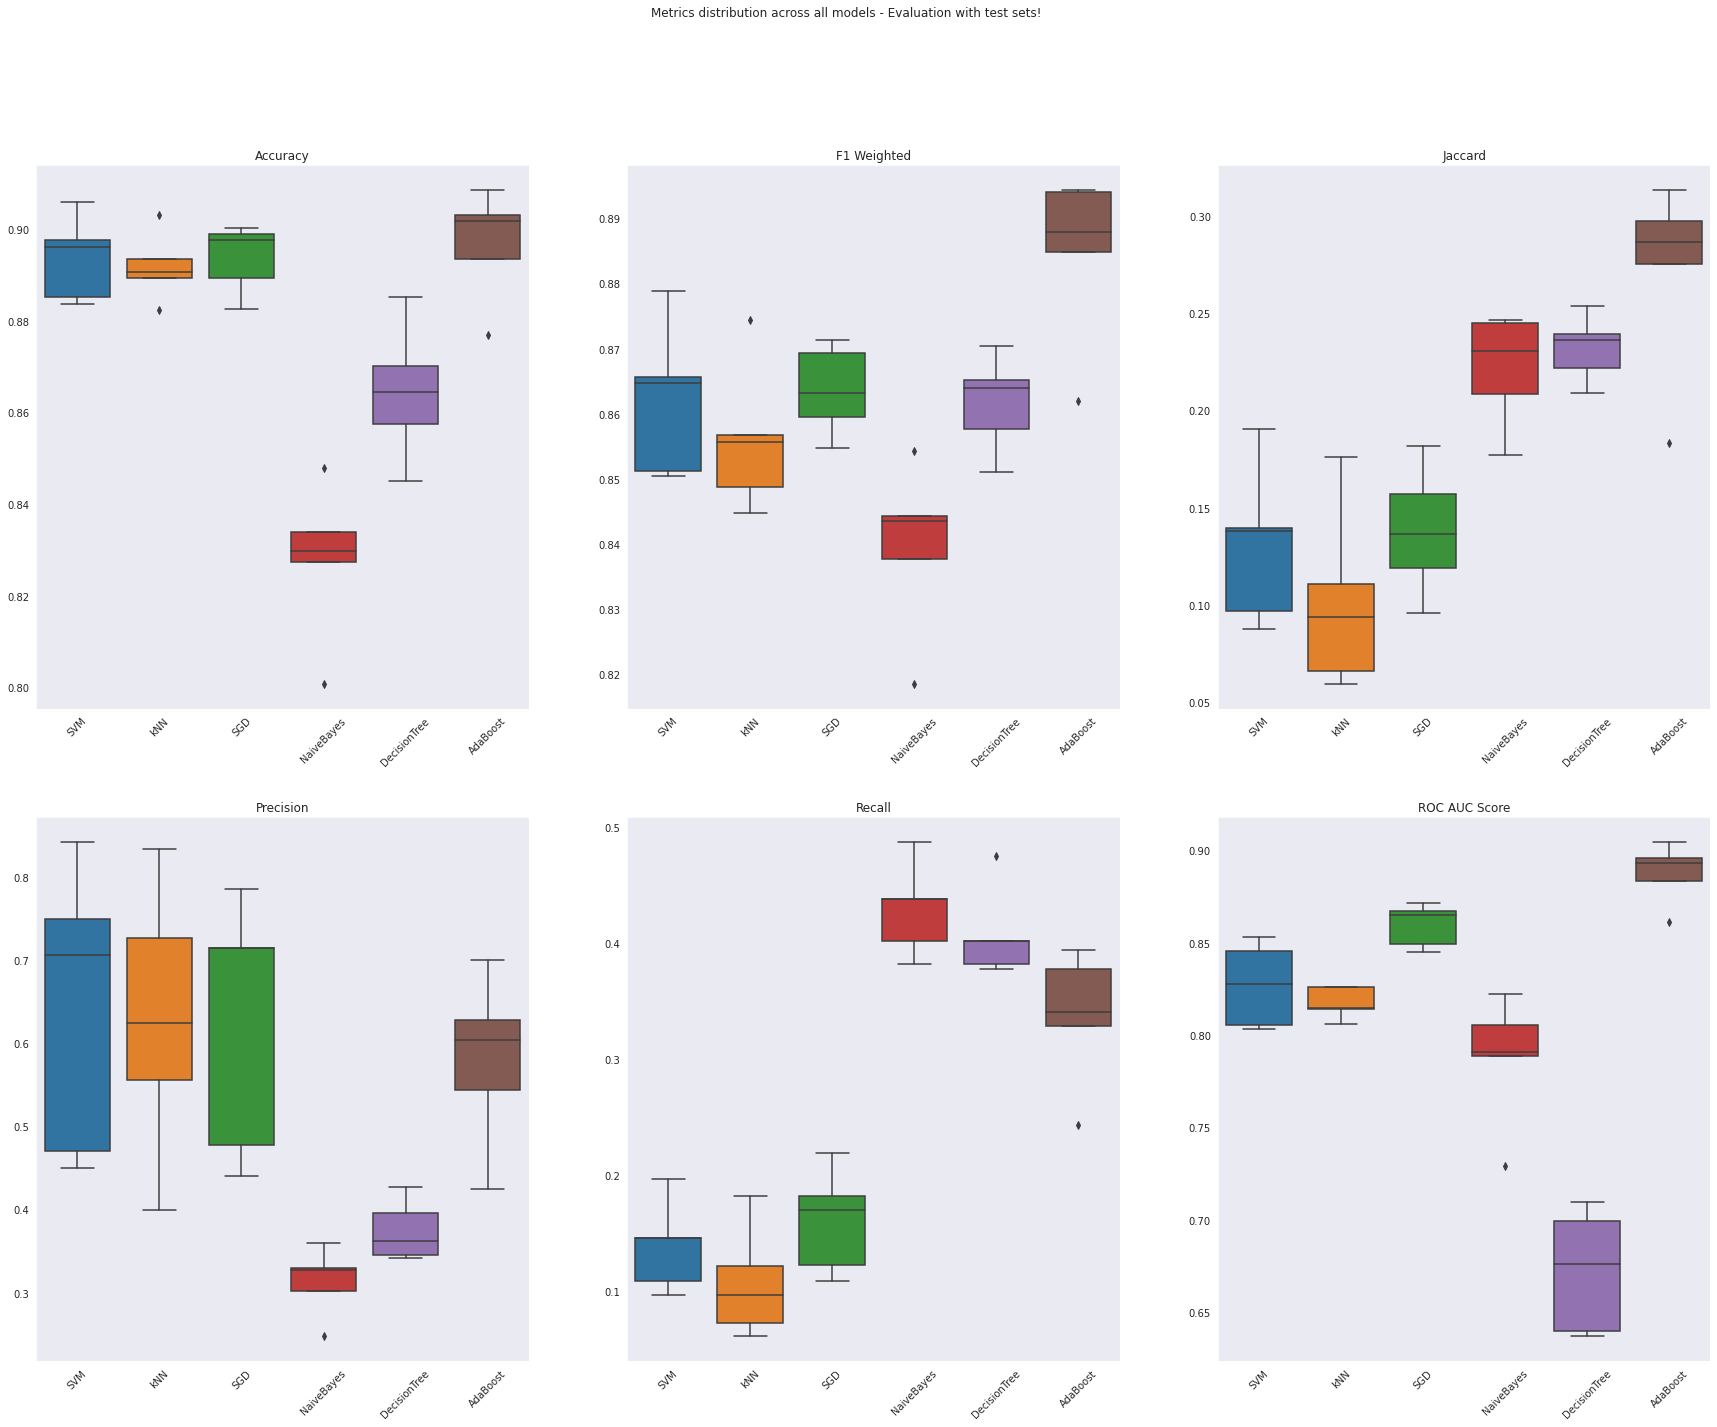

In [ ]:
# Create plots for all metrics
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(30, 22))
# Flatten axes for iteration purposes
ax = ax.flatten()

# Add Suptitle
fig.suptitle('Metrics distribution across all models - Evaluation with test sets!')

# Iterate through all metrics and add them to the plot
for i, sc in enumerate(scores):
  sns.boxplot(data=sc, ax=ax[i])
  ax[i].set_title(score_names[i])
  ax[i].tick_params('x', labelrotation=45)